# Practical session 2: Regression and Resampling

<div class="alert alert-block alert-info">
    <h2>Table of Contents </h2><a class="anchor" id="top"></a>
    <br><a href="#section_1">1. Using regression and classification models</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_1_1">1.1 Linear regression</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_1_2">1.2 K-nearest neighbors regression</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_1_3">1.3 Logistic regression</a>
    <br><a href="#section_2">2. Implementing resampling methods</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_2_1">2.1 Linear regression</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_2_2">2.2 K-nearest neighbors regression</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_2_3">2.3 Logistic regression</a>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#section_2_4">2.4. Bootstrapping (Optional)</a>
</div>


<div class="alert alert-success">
    <p>Green blocks indicate sections where you have to implement code, usually by replacing the ellipses [...].</p>
</div>

<div class="alert alert-block alert-warning">
    Yellow blocks are optional questions and/or exercises.
</div>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

By now, we have seen two regression methods for predicting continuous output (linear regression and K-nearest neighbors), and one classification method for predicting discrete output (logistic regression). In addition, we have learned about model assessment through different resampling methods, i.e., train-test validation, (leave-one-out) cross-validation, and bootstrapping.

In this practical session, we will implement these predictive models and resampling methods using the **scikit-learn** library (written as `sklearn` when you import it), which we have already installed when creating the conda environment.

<h2 style="display: inline"> 1. Using regression and classification models </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_1"></a> 

Scikit-learn is a collection of tools for predictive data anlysis. Among others, it has a collection of [supervised learning models](https://scikit-learn.org/stable/supervised_learning.html), with extensive [documentation](https://scikit-learn.org/stable/modules/classes.html) on each model which also contains example code. The models we are using in this practical are
* [1.1.1 Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)), 
* [1.6.3 Nearest Neighbors Regression](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression) ([API](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)), and
* [1.1.11 Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)).


For now, we will follow these steps when building a regression/classification model:
1. Load the dataset.
2. Declare the model we will use.
3. Fit the training data to the model.
4. Use the model to predict unseen data.

Fortunately, scikit-learn already has a few built-in [datasets](https://scikit-learn.org/stable/datasets.html). In this practical we will only be using the smaller datasets, or [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html), namely the diabetes dataset for regression, and iris dataset for classification.

<h3 style="display: inline"> 1.1 Linear regression </h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_1_1"></a> 

In this section, we demonstrate how to apply linear regression on the diabetes dataset. This dataset contains 442 instances and 10 features, e.g., age, sex, and bmi, to predict a quantitative measure of diabetes progression one year after baseline.

In [2]:
# 1. Load the dataset
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True, as_frame = True, scaled = False)

You can check what the arguments of the `load_diabetes` function does [here](
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Essentially,
* `return_X_y = True` tells the function to return a separate object for the predictors (X) and the response variable (y),
* `as_frame = True` tells the function to return a `pandas.DataFrame` object, and
* `scaled = False` returns unscaled values of the data.

[`pandas`](https://pandas.pydata.org/docs/user_guide/index.html) is a library that helps you work with datasets by 
providing functions for analyzing, cleaning, exploring, and manipulating data. For example, with the command `head`, you can see the first few rows of your data:


In [3]:
# Predictors (or features, or independent variables)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [4]:
# Response (or dependent variable)
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

For the sake of visualization, let us make a model with only 1 predictor, the bmi. You can easily subset a `DataFrame` object by putting its column name(s) in square brackets. However, a single bracket will output a `pandas.Series` object (which we can't directly use to fit the model), whereas a double bracket will output a `pandas.DataFrame` object. 

In [5]:
print("Subsetting with single brackets")
print("Data type: {}, \nDimension: {}\n".format(type(diabetes_X['bmi']), diabetes_X['bmi'].shape))

print("Subsetting with double brackets")
print("Data type: {}, \nDimension: {}".format(type(diabetes_X[['bmi']]), diabetes_X[['bmi']].shape))

Subsetting with single brackets
Data type: <class 'pandas.core.series.Series'>, 
Dimension: (442,)

Subsetting with double brackets
Data type: <class 'pandas.core.frame.DataFrame'>, 
Dimension: (442, 1)


Now, let's build the model!

In [6]:
from sklearn.linear_model import LinearRegression

# 2. Declare the model
linreg_model = LinearRegression()

# 3. Fit the model to the dataset
linreg_model.fit(diabetes_X[['bmi']], diabetes_y)

LinearRegression()

<div class="alert alert-block alert-warning">
    Fit the model on the data subsetted with single brackets. Try to fix the error by following the instructions on the error message.
</div>

Before we go on to predicting new output, let's first visualize what our model is doing. Recall that linear regression is just finding a straight line that best fits the data. This line can be drawn by getting the intercept and $\beta_1$ cofficient from the model through the the `intercept_` and `coef_` attributes.

In [7]:
print(linreg_model.intercept_)
print(linreg_model.coef_[0])

-117.77336656656527
10.233127870100777


We can overlay this line over the real data.

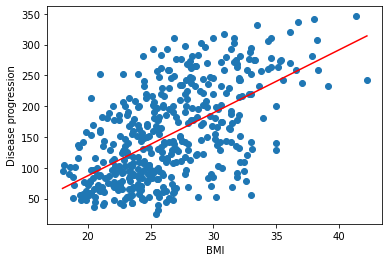

In [8]:
# Select two points: the minimum and maximum of the bmi
x1 = diabetes_X[['bmi']].min()
x2 = diabetes_X[['bmi']].max()

# Calculate y values using slope-intercept equation
y1 = linreg_model.coef_[0] * x1 + linreg_model.intercept_
y2 = linreg_model.coef_[0] * x2 + linreg_model.intercept_

plt.scatter(diabetes_X[['bmi']], diabetes_y)   # Plot real data
plt.plot([x1, x2], [y1, y2], color='red')      # Plot predicted line
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.show()

Finally, you can use the model to predict what the expected disease progression is for a given BMI.

In [9]:
# 4. Use the model to predict new output
# e.g., people with BMI of 25, 35, and 28.5
linreg_model.predict([[25], [35], [28.5]])

/apps/gent/RHEL8/haswell-ib/software/scikit-learn/1.1.2-intel-2022a/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138.05483019, 240.38610889, 173.87077773])

Note that these values lie on the red line of the figure above.

<h3 style="display: inline"> 1.2 K-nearest neighbors regression </h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_1_2"></a> 

<div class="alert alert-success">
    <h3>Exercise</h3>
        <p>Follow the same workflow as above and perform KNN regression on the diabetes dataset, using only the BMI as the feature.</p>
</div>

In [10]:
# 1. Dataset already loaded (diabetes_X[['bmi']] and diabetes_y)

# Import k-nearest neighbors model from sklearn
from sklearn.neighbors import KNeighborsRegressor

# 2. Declare the model
knn_model = KNeighborsRegressor()

# 3. Fit the model to the dataset
knn_model.fit(diabetes_X[['bmi']], diabetes_y)

KNeighborsRegressor()

Since KNN is not a linear model, it has no `coef_` or `intercept_` attribute, and we cannot draw a straight line to see where our predictions will lie on. We will visualize the predicted values by creating the entire range of x values and seeing what is predicted.

In [11]:
# Create 100 evenly-spaced data points between the minimum and maximum bmi values
x_values = np.linspace(diabetes_X[['bmi']].min(), diabetes_X[['bmi']].max(), num = 100)

# 4. Predict
y_values = knn_model.predict(x_values)

/apps/gent/RHEL8/haswell-ib/software/scikit-learn/1.1.2-intel-2022a/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


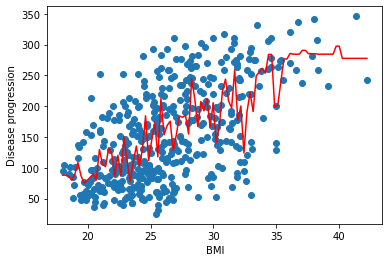

In [12]:
plt.scatter(diabetes_X[['bmi']], diabetes_y)   # Plot real data
plt.plot(x_values, y_values, color='red')      # Plot predicted values
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.show()

<h2 style="display: inline"> 1.3 Logistic regression </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_1_3"></a>

For this, we will use the iris dataset to perform classification. 

<div class="alert alert-success">
    <h3>Exercise</h3>
    <p>Load and <b>explore</b> the iris toy dataset, then follow the same workflow as above to perform logistic regression.</p>
</div>

In [13]:
# 1. Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y = True, as_frame = True)

<div class="alert alert-block alert-warning">
    How many features are in this dataset? How many samples? How many classes of irises are there?
</div>

In [14]:
print("{} samples x {} features".format(iris_X.shape[0], iris_X.shape[1]))
print(len(iris_X))     # this also returns the number of rows (samples)
print("Classes:", set(iris_y))     # easy way to see unique values - 3 classes

150 samples x 4 features
150
Classes: {0, 1, 2}


In [15]:
print(iris_y.value_counts()) # Easy way to show how many instances are in a class
# Results mean that there are 50 instances per class

0    50
1    50
2    50
Name: target, dtype: int64


In [16]:
# Import logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# 2. Declare the model
logreg_model = LogisticRegression()

# 3. Fit the model to the dataset
logreg_model.fit(iris_X, iris_y)

/apps/gent/RHEL8/haswell-ib/software/scikit-learn/1.1.2-intel-2022a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<div class="alert alert-block alert-warning">
    If you got a <b>ConvergenceWarning</b>, try reading the error message and see if you can fix it!<br> <b>Solution:</b> include <code>max_iter</code> in the model declaration, so <code>LogisticRegression(max_iter=1000)</code>.
</div>

Try predicting the class of the first 10 samples of the dataset, are these the same as the true classes in `iris_y`?

In [17]:
predicted_iris_y = logreg_model.predict(iris_X[:10])

# Check if predicted_iris_y is the same as the iris_y
all(predicted_iris_y == iris_y[:10])

True

<h2 style="display: inline">2. Implementing resampling methods</h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2"></a> 

In the previous section, we trained our models on the entire dataset, which can lead to overfitting of the data and underestimation of the error. We will mitigate this by using different resampling methods and evaluating model performance. This adds two more steps from our approach above:

<ol>
<li> Load the dataset. </li>
<b><li>Partition the dataset.</li></b>
<li>Declare the model we will use.</li>
<li>Fit the training data to the model.</li>
<li>Use he model to predict unseen data.</li>
<b><li>Evaluate the model.</li></b>
</ol>

These new steps go hand-in-hand and are also grouped together in [Chapter 3](https://scikit-learn.org/stable/model_selection.html) of the scikit-learn user guide, with documentation of the resampling methods found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

Once again, we will start with the linear regression model on the diabetes dataset.

<h3 style="display: inline">2.1 Linear regression</h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2_1"></a>

#### 2.1.1 Evaluate model performance with no partitioning

We will repeat the code from section 1.1 here with some changes. Mainly, we demonstrate the use of the `score` function, which is a general function for evaluating models. For linear regression, it computes the $R^2$ score.

In [18]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Set scaled = True so features are more comparable
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True, as_frame = True, scaled = True)

# Can also combine two steps like this
# We will use the entire dataset this time
linreg_model = LinearRegression().fit(diabetes_X, diabetes_y)

# 6. Evaluate the model
linreg_model.score(diabetes_X, diabetes_y)

0.5177484222203498

#### 2.1.2 Evaluate model performance with train-test partitioning

Partitioning of the dataset can be done with [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) (default: 0.75-0.25 split). The `random_state` parameter is used for reproducibility, so everyone who runs the code with the same random state has their data split the same way.

<div class="alert alert-success">
    <h3>Exercise</h3>
    <p>Partition the data with <code>train_test_split</code> and compare model performance on training and test data. </p>
</div>

In [19]:
from sklearn.model_selection import train_test_split
db_X_train, db_X_test, db_y_train, db_y_test = train_test_split(diabetes_X, diabetes_y, random_state = 42)

# Fit data only on training model
linreg_model = LinearRegression().fit(db_X_train, db_y_train)

linreg_train_score = linreg_model.score(db_X_train, db_y_train)
linreg_test_score = linreg_model.score(db_X_test, db_y_test)

# Compare model performance on test vs train data
print("Score on train data:", linreg_train_score)
print("Score on test data:", linreg_test_score)

Score on train data: 0.519034189167905
Score on test data: 0.4849058889476756


As expected, our model performs worse on data it has never seen before (the test data).

#### 2.1.3 Cross-validation

[`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) is an object class that is used to generate groups for cross-validation. It generates indices for splitting the data into `n_split` number of groups. We visualize this below (you can ignore the code inside the `for` loop):

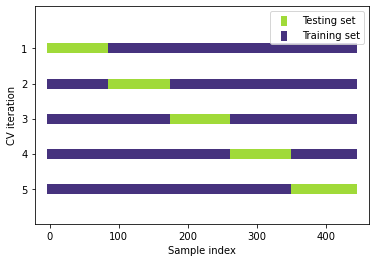

In [20]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits)

fig, ax = plt.subplots() # Create empty figure

for fold_i, (train_index, test_index) in enumerate(kf.split(diabetes_X, diabetes_y)):
    
    n_samples = len(diabetes_X)
    
    # Create an array of zeros 1 and make the test set indices = 1
    indices = np.zeros(n_samples)
    indices[test_index] = 1

    # Visualize the results
    ax.scatter(range(n_samples),
               [fold_i + 1] * n_samples,  
               c=indices,              # Color is determined values of the array (0 or 1)
               marker="_", lw=10,
               vmin=-0.2, vmax=1.2)

# Formatting
ax.set(xlabel="Sample index", ylabel="CV iteration",
       yticks=np.arange(n_splits) + 1, ylim=[n_splits + 1, -0.2])

ax.legend(["Testing set", "Training set"])

As you can see, the dataset gets partitioned into 5 groups, with the test set changing every fold. What is important from the code block above is that you will have to **iterate the `KFold` object you declared in a `for` loop.** You can then train and evaluate the model inside each loop.

<div class="alert alert-success">
    <h3>Exercise</h3>
    <p>Implement 5-fold cross validation by filling in the code below.</p>
</div>

In [21]:
scores_per_fold_train = []
scores_per_fold_test = []

n_splits = 5
kf = KFold(n_splits=n_splits)

i = 1
for (train_index, test_index) in kf.split(diabetes_X, diabetes_y):
    # Subset training indices
    db_X_train_i = diabetes_X.iloc[train_index]
    db_y_train_i = diabetes_y.iloc[train_index]
    
    # Subset test indices
    db_X_test_i = diabetes_X.iloc[test_index]
    db_y_test_i = diabetes_y.iloc[test_index]
    
    # Declare model and fit data only on training model of this fold
    linreg_model = LinearRegression().fit(db_X_train_i, db_y_train_i)

    # Store model performance on test vs train data
    scores_per_fold_train.append(linreg_model.score(db_X_train_i, db_y_train_i))
    scores_per_fold_test.append(linreg_model.score(db_X_test_i, db_y_test_i))
    
    i += 1

# Just code for printing, can ignore
printing = list(zip(np.arange(1, n_splits + 1), scores_per_fold_train, scores_per_fold_test))
print('\n'.join('Fold {}\n  Train: {:.2f}\n  Test: {:.2f}'.format(*fold) for fold in printing))
print('Average train score: {:.3f}'.format(np.mean(scores_per_fold_train)))
print('Average test score: {:.3f}'.format(np.mean(scores_per_fold_test)))

Fold 1
  Train: 0.52
  Test: 0.43
Fold 2
  Train: 0.51
  Test: 0.52
Fold 3
  Train: 0.52
  Test: 0.48
Fold 4
  Train: 0.53
  Test: 0.43
Fold 5
  Train: 0.51
  Test: 0.55
Average train score: 0.520
Average test score: 0.482


<div class="alert alert-block alert-warning">
    Leave-one-out cross-validation (LOOCV) is a special case of cross-validation. What would <b>n_splits</b> have to be if you want to perform LOOCV?<br>
    <b>Answer:</b> It would be the equal to the number of samples, so 442 in this case.
</div>

<h3 style="display: inline">2.2 KNN  regression</h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2_2"></a> 

<div class="alert alert-success">
    <h3>Exercise</h3>
        <p>Implement KNN on the train-test partitioning and 5-fold cross-validation. In both cases, compare scores between training and test data.</p>
</div>

#### 2.2.1 Train-test partitioning

In [22]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True, as_frame = True, scaled = True)

# Partition data into train and test data
db_X_train, db_X_test, db_y_train, db_y_test = train_test_split(diabetes_X, diabetes_y)

# Declare model and fit
knn_model = KNeighborsRegressor().fit(db_X_train, db_y_train)

# Compare scores
knn_train_score = knn_model.score(db_X_train, db_y_train)
knn_test_score = knn_model.score(db_X_test, db_y_test)

print("Score on train data:", knn_train_score)
print("Score on test data:", knn_test_score)

Score on train data: 0.5868563499992625
Score on test data: 0.3412918896172462


<div class="alert alert-block alert-warning">
    1. Compared to linear regression, the difference between the train and test performance of KNN is much higher. Can you explain this? <br> 2. What is the default number of neighbors used by the model? <br>   
    3. Try using different number of neighbors for the model and compare their performances.
</div>

#### 2.2.2 Cross-validation

<div class="alert alert-block alert-warning">
    <b>Challenge:</b> Try and see if you can implement this without looking at the code from the previous section! (But looking at the documentation is allowed.)
</div>

In [23]:
scores_per_fold_train = []
scores_per_fold_test = []

n_splits = 5
kf = KFold(n_splits=n_splits)

i = 1
for (train_index, test_index) in kf.split(diabetes_X, diabetes_y):
    db_X_train_i = diabetes_X.iloc[train_index]
    db_y_train_i = diabetes_y.iloc[train_index]
    
    db_X_test_i = diabetes_X.iloc[test_index]
    db_y_test_i = diabetes_y.iloc[test_index]
    
    # Fit data only on training model of this fold
    knn_model = KNeighborsRegressor().fit(db_X_train_i, db_y_train_i)

    # Store model performance on test vs train data
    scores_per_fold_train.append(knn_model.score(db_X_train_i, db_y_train_i))
    scores_per_fold_test.append(knn_model.score(db_X_test_i, db_y_test_i))
    
    i += 1

print('Average train score: {:.3f}'.format(np.mean(scores_per_fold_train)))
print('Average test score: {:.3f}'.format(np.mean(scores_per_fold_test)))

Average train score: 0.588
Average test score: 0.377


<h3 style="display: inline">2.3 Logistic regression</h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2_3"></a> 

<div class="alert alert-success">
    <h3>Exercise</h3>
        <p>Implement logistic regression on the train-test partitioning and 5-fold cross-validation of the iris dataset. In both cases, compare scores between training and test data.</p>
</div>

#### 2.3.1 Train-test partitioning

In [24]:
# Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y = True, as_frame = True)

# Partition data into train and test data
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, random_state=30)

# Declare model and fit
logreg_model = LogisticRegression(max_iter=300).fit(iris_X_train, iris_y_train)

# Compare scores
logreg_train_score = logreg_model.score(iris_X_train, iris_y_train)
logreg_test_score = logreg_model.score(iris_X_test, iris_y_test)

print("Score on train data:", logreg_train_score)
print("Score on test data:", logreg_test_score)

Score on train data: 0.9821428571428571
Score on test data: 0.9473684210526315


<div class="alert alert-block alert-warning">
    For regression models, the score is the $R^2$ value. What does the <b>score</b> refer to for logistic regression? <br> <b>Answer:</b> The accuracy.
</div>

In this case, the accuracy is the fraction of correct predictions. We can calculate this ourselves or use the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function. We see that both cases return the same value as the `score` function above.

In [27]:
# calculate this ourselves
print(np.sum(logreg_model.predict(iris_X_test) == iris_y_test)/len(iris_y_test))  

# or use premade function
from sklearn.metrics import accuracy_score
print(accuracy_score(logreg_model.predict(iris_X_test), iris_y_test)) 

0.9473684210526315
0.9473684210526315


#### 2.3.2 Cross-validation

For this section, it is important that you use `StratifiedKFold` instead of `KFold`. Recall the barplot we generated in 2.1.3, and notice that `KFold` splits the dataset into groups according in an orderly manner. Now notice how the `iris` dataset is organized (the different colors refer to different classes).

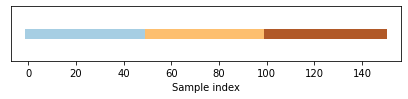

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 1)) # Create empty figure
n_samples = len(iris_X)
    
ax.scatter(range(n_samples), [1]*n_samples, c=iris_y, marker="_", lw=10, cmap = plt.cm.Paired)
    
# Formatting
ax.set(xlabel="Sample index")
ax.yaxis.set_tick_params(labelleft=False)
ax.set_yticks([])
plt.show()

Unlike `Kfold`, each group created by `StratifiedKFold` will have an equal number of samples from each class.

In [29]:
from sklearn.model_selection import StratifiedKFold

scores_per_fold_train = []
scores_per_fold_test = []

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits)

i = 1
for (train_index, test_index) in kf.split(iris_X, iris_y):
    iris_X_train_i = iris_X.iloc[train_index]
    iris_y_train_i = iris_y.iloc[train_index]
    
    iris_X_test_i = iris_X.iloc[test_index]
    iris_y_test_i = iris_y.iloc[test_index]
    
    # Fit data only on training model of this fold
    logreg_model = LogisticRegression(max_iter=300).fit(iris_X_train_i, iris_y_train_i)   

    # Store model performance on test vs train data
    scores_per_fold_train.append(logreg_model.score(iris_X_train_i, iris_y_train_i))
    scores_per_fold_test.append(logreg_model.score(iris_X_test_i, iris_y_test_i))
    
    i += 1

print('Average train score: {:.3f}'.format(np.mean(scores_per_fold_train)))
print('Average test score: {:.3f}'.format(np.mean(scores_per_fold_test)))

Average train score: 0.975
Average test score: 0.973


<div class="alert alert-block alert-warning">
    Compare the results of using <code>KFold</code> with <code>StratifiedKFold</code>.
</div>

<h3 style="display: inline">2.4 Bootstrapping (Optional)</h3> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2_4"></a> 

In this section, we demonstrate bootstrapping with linear regression on the diabetes dataset. We will implement this using the `resample` function with `replace=TRUE`, indicating that we are sampling with replacement. We will sample from the row labels (`.index`) of the dataset, which in the diabetes dataset is just a range of numbers from 0 to 441.

In [30]:
diabetes_X.index

RangeIndex(start=0, stop=442, step=1)

We will resampling our training data `n_iteration` times, fitting `n_iteration` linear regression models in the process. We will also store all $R^2$ values and model coefficient estimates in a `DataFrame`.

In [31]:
from sklearn.utils import resample
import time

start_time = time.time()
n_iterations = 1000

# Initialize estimator
linreg_model = LinearRegression()

# Initialize DataFrame to hold bootstrap statistics
bootstrapped_stats = pd.DataFrame()

# Each loop iteration is a single bootstrap resample and model fit
for i in range(n_iterations):
    
    # As training set, sample with replacement using row labels
    # Define test set to be all observations not in training set
    train_index = resample(diabetes_X.index, replace=True)
    test_index = diabetes_X.index[~diabetes_X.index.isin(train_index)]
    
    # Can reuse same code from the cross-validation!
    db_X_train_i = diabetes_X.iloc[train_index]
    db_y_train_i = diabetes_y.iloc[train_index]
    
    db_X_test_i = diabetes_X.iloc[test_index]
    db_y_test_i = diabetes_y.iloc[test_index]

    # Fit model
    linreg_model.fit(db_X_train_i, db_y_train_i)

    # Store model coefficients and score in DataFrame
    data = {'intercept':linreg_model.intercept_,
            'beta_coefficient':linreg_model.coef_[0],
            'train_score':linreg_model.score(db_X_train_i, db_y_train_i),
            'test_score':linreg_model.score(db_X_test_i, db_y_test_i)
    }

    bootstrapped_stats_i = pd.DataFrame(data, index = [i])
    
    # Concatenate result
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])
    
print("Runtime: {:.5f} seconds".format(time.time() - start_time))

Runtime: 5.81231 seconds


In [32]:
bootstrapped_stats.head()

,intercept,beta_coefficient,train_score,test_score
0,156.161544,-188.489880,0.540453,0.435040
1,152.147671,100.717956,0.556511,0.463032
2,150.673297,49.974970,0.627721,0.312179
3,147.756935,-2.383292,0.490320,0.517640
4,147.721653,-32.569187,0.530726,0.527316


Let's take a look at the statistics:

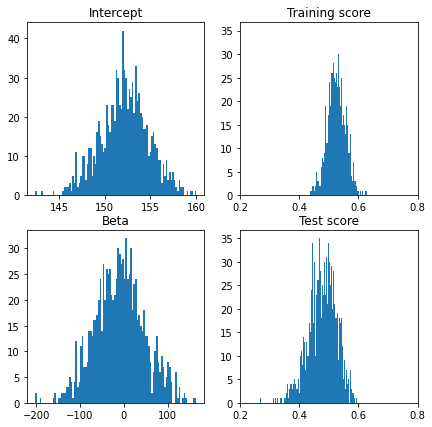

In [33]:
fig, axs = plt.subplots(2, 2, figsize = (7, 7))

axs[0, 0].hist(bootstrapped_stats["intercept"], bins=100)
axs[0, 0].set_title('Intercept')
axs[1, 0].hist(bootstrapped_stats["beta_coefficient"], bins=100)
axs[1, 0].set_title('Beta')
axs[0, 1].hist(bootstrapped_stats["train_score"], bins=100)
axs[0, 1].set_title('Training score')
axs[0, 1].set_xlim(0.2, 0.8)
axs[1, 1].hist(bootstrapped_stats["test_score"], bins=100)
axs[1, 1].set_title('Test score')
axs[1, 1].set_xlim(0.2, 0.8)
plt.show()

<div class="alert alert-block alert-warning">
    Implement bootstrapping for KNN and logistic regression. Do the training and test scores follow the same distribution as those of linear regression? <br> Additionally, compare the runtime of all three methods over these bootstrapping iterations. Does this match with their computational complexity?
</div>

**KNN regression**

Runtime: 10.20986 seconds


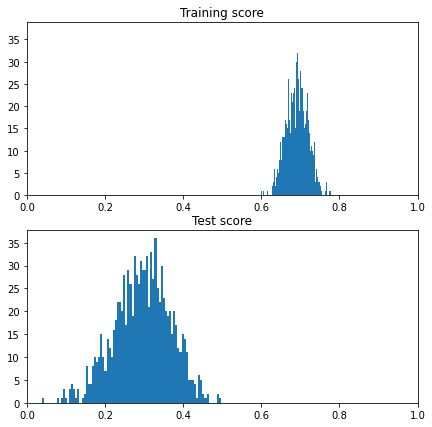

In [34]:
start_time = time.time()
n_iterations = 1000

# Initialize estimator
knn_model = KNeighborsRegressor()

# Initialize DataFrame to hold bootstrap statistics
bootstrapped_stats = pd.DataFrame()

# Each loop iteration is a single bootstrap resample and model fit
for i in range(n_iterations):
    
    # As training set, sample with replacement using row labels
    # Define test set to be all observations not in training set
    train_index = resample(diabetes_X.index, replace=True)
    test_index = diabetes_X.index[~diabetes_X.index.isin(train_index)]
    
    # Can reuse same code from the cross-validation!
    db_X_train_i = diabetes_X.iloc[train_index]
    db_y_train_i = diabetes_y.iloc[train_index]
    
    db_X_test_i = diabetes_X.iloc[test_index]
    db_y_test_i = diabetes_y.iloc[test_index]

    # Fit model
    knn_model.fit(db_X_train_i, db_y_train_i)

    # Store model coefficients and score in DataFrame
    data = {'train_score':knn_model.score(db_X_train_i, db_y_train_i),
            'test_score':knn_model.score(db_X_test_i, db_y_test_i)
    }

    bootstrapped_stats_i = pd.DataFrame(data, index = [i])
    
    # Concatenate result
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])

print("Runtime: {:.5f} seconds".format(time.time() - start_time))

fig, axs = plt.subplots(2, 1, figsize = (7, 7))

axs[0].hist(bootstrapped_stats["train_score"], bins=100)
axs[0].set_title('Training score')
axs[0].set_xlim(0, 1)
axs[1].hist(bootstrapped_stats["test_score"], bins=100)
axs[1].set_title('Test score')
axs[1].set_xlim(0, 1)
plt.show()

**Logistic Regression**

Runtime: 26.76210 seconds


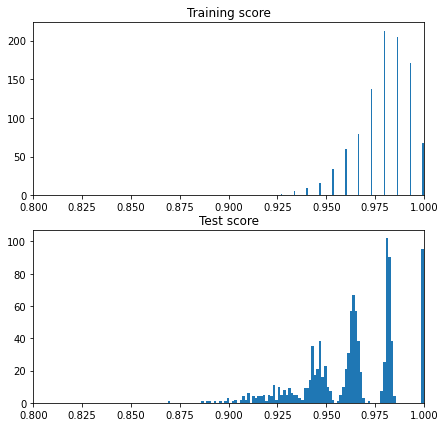

In [35]:
start_time = time.time()
n_iterations = 1000

# Initialize estimator
logreg_model = LogisticRegression(max_iter=300)

# Initialize DataFrame to hold bootstrap statistics
bootstrapped_stats = pd.DataFrame()

# Each loop iteration is a single bootstrap resample and model fit
for i in range(n_iterations):
    
    # As training set, sample with replacement using row labels
    # Define test set to be all observations not in training set
    train_index = resample(iris_X.index, replace=True)
    test_index = iris_X.index[~iris_X.index.isin(train_index)]
    
    # Can reuse same code from the cross-validation!
    iris_X_train_i = iris_X.iloc[train_index]
    iris_y_train_i = iris_y.iloc[train_index]
    
    iris_X_test_i = iris_X.iloc[test_index]
    iris_y_test_i = iris_y.iloc[test_index]

    # Fit model
    logreg_model.fit(iris_X_train_i, iris_y_train_i)

    # Store model coefficients and score in DataFrame
    data = {'train_score':logreg_model.score(iris_X_train_i, iris_y_train_i),
            'test_score':logreg_model.score(iris_X_test_i, iris_y_test_i)
    }

    bootstrapped_stats_i = pd.DataFrame(data, index = [i])
    
    # Concatenate result
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])
    
print("Runtime: {:.5f} seconds".format(time.time() - start_time))
fig, axs = plt.subplots(2, 1, figsize = (7, 7))

axs[0].hist(bootstrapped_stats["train_score"], bins=100)
axs[0].set_title('Training score')
axs[0].set_xlim(0.8, 1)
axs[1].hist(bootstrapped_stats["test_score"], bins=100)
axs[1].set_title('Test score')
axs[1].set_xlim(0.8, 1)
plt.show()